# 1. Ensemble Methods

We all do that! Before we make any big decisions, we ask people’s opinions, like our friends, our family members, even our dogs/cats, to prevent us from being biased or irrational.

Ensemble learning is a machine learning paradigm where multiple models (often called “weak learners”) are trained to solve the same problem and combined to get better results. The main hypothesis is that when weak models are correctly combined we can obtain more accurate and robust models.

In ensemble learning theory, we call weak learners (or base models) models that can be used as building blocks for designing more complex models by combining several of them. Most of the time, these base models perform not so well by themselves either because they have high bias or because they have too much variance to be robust (overfitting). Then, the idea of ensemble methods is to try reducing bias and/or variance of such weak learners by combining several of them together in order to create a strong learner (or ensemble model) that achieves better performance.

We can mention three major kinds of meta-algorithms that aim at combining weak learners:

* **Bagging**, that often considers homogeneous weak learners (a single base learning algorithm is used so that we have homogeneous weak learners that are trained in different ways), learns them independently from each other in parallel and combines them following some kind of deterministic averaging process.
* **Boosting**, that often considers homogeneous weak learners, learns them sequentially in a very adaptative way (a base model depends on the previous ones) and combines them following a deterministic strategy.
* **Stacking**, that often considers heterogeneous weak learners, learns them in parallel and combines them by training a meta-model to output a prediction based on the different weak models' predictions.

Very roughly, we can say that bagging will mainly focus on getting an ensemble model with less variance than its components whereas boosting and stacking will mainly try to produce strong models less biased than their components (even if variance can also be reduced).

# 2. Bagging

**Bagging** stands for **bootstrap aggregating**.

Let’s begin by defining **bootstrapping**. This statistical technique consists in generating samples of size B (called bootstrap samples) from an initial dataset of size N by randomly drawing with replacement B observations, i.e. It's possible to have the same observation multiple times in the same sample.

<img src="figures/bootstrapping.png" alt="bootstrapping" style="width: 500px;"/>

Under some assumptions, these samples have pretty good statistical properties: they can be seen as being drawn both directly from the true underlying (and often unknown) data distribution and independently from each others. So, they can be considered as representative and independent samples of the true data distribution. To make this approximation valid: First, the size N of the initial dataset should be large enough to capture most of the complexity of the underlying distribution so that sampling from the dataset is a good approximation of sampling from the real distribution (representativity). Second, the size N of the dataset should be large enough compared to the size B of the bootstrap samples so that samples are not too much correlated (independence). 

**Bagging** is used when our goal is to reduce the variance of a **weak learner** such as a **decision tree**. Here the idea is to create several subsets of data from the training sample chosen randomly with replacement. Now, each subset of data is then used to train its decision tree. As a result, we end up with an ensemble of different models. Average of all the predictions from different trees are used which is more robust than a single decision tree.

<img src="figures/bagging.png" alt="bagging" style="width: 500px;"/>

**Aggregation**: There are several possible ways to aggregate the multiple models fitted in parallel. For a regression problem, the outputs of individual models can literally be averaged to obtain the output of the ensemble model. For classification problems, the class outputted by each model can be seen as a vote and the class that receives the majority of the votes is returned by the ensemble model (this is called hard-voting). Still, for a classification problem, we can also consider the probabilities of each class returned by all the models, average these probabilities, and keep the class with the highest average probability (this is called soft-voting). Averages or votes can either be simple or weighted if any relevant weights can be used.

# 3. Random Forests

Decision trees are very popular base models for ensemble methods. Strong learners composed of multiple trees can be called “forests”. Trees that compose a forest can be chosen to be either be shallow (few depths) or deep (a lot of depths, if not fully grown). Shallow trees have less variance but higher bias and then will be a better choice for sequential methods such as boosting. Deep trees, on the other side, have low bias but high variance and, so, are relevant choices for the bagging method that is mainly focused on reducing variance.

The random forest approach is a bagging method where deep trees, fitted on bootstrap samples, are combined to produce an output with lower variance. However, random forests also use another trick to make the multiple fitted trees a bit less correlated with each other: They use a **modified tree learning algorithm that selects, at each candidate split in the learning process, a random subset of the features**. This process is sometimes called "feature bagging". The reason for doing this is the correlation of the trees in an ordinary bootstrap sample: if one or a few features are very strong predictors for the response variable (target output), these features will be selected in many of the B trees, causing them to become correlated. 

To sum up, **random forests** uses two key concepts that give it the name random:
* Random sampling of training data points when building trees
* Random subsets of features considered when splitting nodes

<img src="figures/random_forest.png" alt="random_forest" style="width: 800px;"/>

### Random Forest hyperparameters

For random forest algorithms, one can manipulate a variety of key attributes that define model structure. A comprehensive list can be found under the documentation for scikit-learn’s random forest classifier [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). The following five hyperparameters are commonly adjusted using scikit-learn:

* Number of estimators **n_estimators**: Random forest models are ensembles of decision trees and we can define the number of decision trees in the forest. Additional decision trees typically improve model accuracy because predictions are made based on a larger number of “votes” from diverse trees, however, large numbers of trees are computationally expensive.
* Maximum features to consider for split **max_features**: Random forest models randomly resample features prior to determining the best split. max_features determines the number of features to resample. Larger max_feature values can result in improved model performance because trees have a larger selection of features from which to choose the best split, but can also cause trees to be less diverse and induce overfitting. The common theme here is one needs to identify an optimal value that balances overfitting and under-fitting. Common choices include:
    * ‘auto’: places no restrictions on the number of features,
    * ‘sqrt’: square root of the total number of features,
    * ‘log2’: base two logarithms of the total number of features.
* The maximum depth of a tree **max_depth**: A range of depth values should be evaluated, including “None” where trees are split until all the leaves are pure.
* Minimum samples for a node split **min_samples_split**: We can control the minimum number of samples required to split each node. 
* Minimum samples for a terminal node (leaf) **min_samples_leaf**: Much like stopping the growth of trees once a minimum number of samples per split is reached, we can set the minimum number of samples required for each leaf. With values too large, the trees may not be able to split enough to capture sufficient variation in the data. Optimal values for this hyperparameter are dependent on the size of the training set.

Validation and cross-validation are often used to determine the optimal values for hyperparameters; we want to identify a model structure that performs the best on records it has not been trained on. A variety of hyperparameter values should be considered. 

# 3. Boosting

Boosting methods work in the same spirit as bagging methods: we build a family of models that are aggregated to obtain a strong learner that performs better. However, unlike bagging that mainly aims at reducing variance, boosting is a technique that consists in fitting sequentially multiple weak learners in a very adaptative way: each model in the sequence is fitted giving more importance to observations in the dataset that were badly handled by the previous models in the sequence. Intuitively, each new model focuses its efforts on the most difficult observations to fit up to now, so that we obtain, at the end of the process, a strong learner with lower bias (even if we can notice that boosting can also have the effect of reducing variance). Boosting, like bagging, can be used for regression as well as for classification problems.

<img src="figures/boosting.png" alt="boosting" style="width: 700px;"/>

But the question is, how can weak learners be sequentially fitted (what information from previous models do we take into account when fitting current model?) and how they will be aggregated (how do we aggregate the current model to the previous ones?). There are two important boosting algorithms: **adaboost** and **gradient boosting**.

In a nutshell, these two meta-algorithms differ on how they create and aggregate the weak learners during the sequential process. Adaptive boosting updates the weights attached to each of the training dataset observations whereas gradient boosting updates the value of these observations. 

## 3.1. Adaptative boosting

Adaptive Boosting, or most commonly known AdaBoost, is a Boosting algorithm. This method corrects its predecessor by paying more attention to underfitted training instances by the previous model. Hence, at every new predictor, the focus will be, each time, on the harder cases.

To build an AdaBoost classifier, we train a Decision Tree algorithm (considered as our weak learner) to make predictions on our training data. Now, following the methodology of AdaBoost, the weight of the misclassified training instances is increased. The second classifier is trained and acknowledges the updated weights and it repeats the procedure over and over again. 

<img src="figures/adaboost.png" alt="adaboost" style="width: 600px;"/>

> At the end of every model prediction we end up boosting the weights of the misclassified instances so that the next model does a better job on them, and so on.

The great disadvantage of this algorithm is that the model cannot be parallelized since each predictor can only be trained after the previous one has been trained and evaluated.

Below are the steps for performing the AdaBoost algorithm:

* **Step 0: Initially, all observations are given equal weights.**

Initialize the weights of data points. If the training set has 100 data points, then each point’s initial weight should be 1/100 = 0.01.
* **Step 1: Train the weak learner with the given data points weights.**
* **Step 2: Calculate the error rate (e) of the decision tree.** 

Using this model, predictions are made on the whole dataset. The error rate (e) is just how many wrong predictions out of total (we treat the wrong predictions differently based on its data point’s weight). The higher the weight of the data point, the more the corresponding error will be weighted during the calculation of the (e).

* **Step 3: Calculate this decision tree’s weight in the ensemble**
    * the higher error rate of a tree, the less decision power (the less the tree's weight is) the tree will be given during the later voting
    * the lower weighted error rate of a tree, the higher decision power (the more the tree's weight is) the tree will be given during the later voting
    * In many adaboost algorithms, the weight of the tree = learning rate * log( (1 — e) / e)
* **Step 4: Update weights of wrongly classified points**: While creating the next model, higher weights are given to the data points which were predicted incorrectly.
    * if the model got this data point correct, the weight stays the same
    * if the model got this data point wrong, the new weight of this point = old weight * np.exp(weight of this tree) 
Note: The higher the weight of the tree (more accurate this tree performs), the more boost (importance) the misclassified data point by this tree will get. The weights of the data points are normalized after all the misclassified points are updated.
* **Step 5: Repeat the process** (until the error function doesn't change or the number of trees we set to train is reached )
* **Step 6: Make the final prediction**
The AdaBoost makes a new prediction by adding up the weight (of each tree) multiplied by the prediction (of each tree). Obviously, the tree with higher weight will have more power of influence on the final decision.

<img src="figures/adaboost2.png" alt="adaboost" style="width: 600px;"/>

### Adaptive Boosting hyperparameters

The most important hyperparameters used for adaboost in scikit-learn are:

* **base_estimators**: specifies the base type estimator, i.e. the algorithm to be used as base learner.
* **n_estimators**: it defines the number of base estimators, where the default is 10 but you can increase it in order to obtain a better performance.
* **learning_rate**: same impact as in gradient descent algorithm
* **max_depth**: Maximum depth of the individual estimator

## 3.2. Gradient Boosting

This is another very popular Boosting algorithm whose work basis is just like what we’ve seen for AdaBoost. Gradient Boosting works by sequentially adding the previous predictors underfitted predictions to the ensemble, ensuring the errors made previously are corrected.

The difference lies in what it does with the underfitted values of its predecessor. Contrary to AdaBoost, which tweaks the instance weights at every interaction, this method tries to fit the new predictor to the residual errors made by the previous predictor.


Below are the steps for performing the Gradient Boosting algorithm:

* **Step 1: Train a decision tree**
* **Step 2: Apply the decision tree just trained to predict**
* **Step 3: Calculate the residuals of this decision tree. Save residual errors as the new target y**
* **Step 4: Repeat Step 1** (until the number of trees we set to train is reached)
* **Step 5: Make the final prediction**: The Gradient Boosting makes a new prediction by simply adding up the predictions (of all trees).

<img src="figures/gradboost.png" alt="adaboost" style="width: 600px;"/>


### Gradient Boosting hyperparameters

The hyperparameters used for gradient boosting in scikit-learn are:

* **min_samples_split**: Minimum number of observation which is required in a node to be considered for splitting. It is used to control overfitting.
* **min_samples_leaf**: Minimum samples required in a terminal or leaf node. Lower values should be chosen for imbalanced class problems since the regions in which the minority class will be in the majority will be very small.
* **max_depth** : maximum depth of a tree. Used to control overfitting.
* **max_features** : number of features it should consider while searching for the best split.



### 3.2.1. XGBoost

Extreme Gradient Boosting is an advanced implementation of the Gradient Boosting. This algorithm has high predictive power and is ten times faster than any other gradient boosting techniques. Moreover, includes a variety of regularisation which reduces overfitting and improves overall performance.

Advantages:
* Implements regularisation helping reduce overfit
* Implements parallel processing makes it much faster 
* Allows users to define custom optimization objectives and evaluation criteria adding a whole new dimension to the model
* XGBoost has an in-built routine to handle missing values
* XGBoost makes splits up to the max_depth specified and then starts pruning the tree backward and removes splits beyond which there is no positive gain
* XGBoost allows a user to run cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run

### 3.2.2. Light GB

For datasets which are extremely large Light Gradient Boosting is the best, compared to all of the other, since it takes less time to run.

<img src="figures/level-wise-tree.png" alt="level-wise-tree" style="width: 460px;"/>

<img src="figures/leaf-wise-tree.png" alt="leaf-wise-tree" style="width: 600px;"/>

This algorithm is based on leaf-wise tree growth contrary to others which work in a level-wise approach pattern. You can see a comparison between XGBoost and Light GB [here](https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/).

# 4. Ensemble Methods with Scikit-Learn

## The dataset

The dataset we'll be using contain the results of a virtual driving simulation of vehicles with an AD system. Based on the results of these simulation, we would like to predict for a new vehicle, whether the distance to the vehicle in front is respected and whether the safety distance is kept at all times, namely 2 seconds.

This variable is therefore binary (Did the vehicle keep the safety distance? Yes or no). We call it a warning.

The explanatory variables are called metadata. These are variables entered in the simulation scenario.

In [14]:
# Import Package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV

Reading the data in csv using `pandas`

In [3]:
metadata = pd.read_csv('Data/metadata.csv')
warnings = pd.read_csv('Data/warnings.csv')
print('metadata dataset size', str(metadata.shape))
print('warnings dataset size', str(warnings.shape))

metadata dataset size (19992, 13)
warnings dataset size (19990, 4)


In [4]:
metadata.head()

,scenario_id,AccelDur_s,LaneWidth_m,PVSpeed_kmh,PVPosit_m,PVAccel_ms2,PVDecel_ms2,PVCar,PVBus,PVMoto,Slope-6,Slope0,Slop6
0,5bc4920704c87d00012789f3,1.4,3.5,82.3,584.0,2.0,2.2,1,0,0,0,1,0
1,5bc4920704c87d00012789f4,1.9,3.5,97.3,563.0,1.5,2.8,1,0,0,0,1,0
2,5bc4920704c87d00012789f5,2.6,3.5,82.0,565.0,2.2,2.1,1,0,0,0,1,0
3,5bc4920704c87d00012789f6,1.8,3.5,83.3,687.0,2.2,1.2,1,0,0,0,1,0
4,5bc4920704c87d00012789f7,2.6,3.5,102.7,562.0,1.4,2.5,1,0,0,0,1,0


In [5]:
warnings.head()

,scenario_id,longitudinal_deceleration,safety_distance_m,safety_distance_s
0,5bc4920704c87d00012789f3,1.0,0.0,0.0
1,5bc4920704c87d00012789f4,0.0,1.0,1.0
2,5bc4920704c87d00012789f5,1.0,0.0,0.0
3,5bc4920704c87d00012789f6,1.0,0.0,0.0
4,5bc4920704c87d00012789f7,0.0,1.0,1.0


From `warnings` dataframe, we will only keep "safety_distance_s".

In [6]:
warnings = warnings[["scenario_id","safety_distance_s"]]

Let's join the dataframes together using the common key `scenario_id`

In [7]:
df = metadata.merge(warnings, left_on='scenario_id', right_on='scenario_id')
df = df.set_index('scenario_id')

In [8]:
#verification merge
df.head()

,AccelDur_s,LaneWidth_m,PVSpeed_kmh,PVPosit_m,PVAccel_ms2,PVDecel_ms2,PVCar,PVBus,PVMoto,Slope-6,Slope0,Slop6,safety_distance_s
scenario_id,,,,,,,,,,,,,
5bc4920704c87d00012789f3,1.4,3.5,82.3,584.0,2.0,2.2,1,0,0,0,1,0,0.0
5bc4920704c87d00012789f4,1.9,3.5,97.3,563.0,1.5,2.8,1,0,0,0,1,0,1.0
5bc4920704c87d00012789f5,2.6,3.5,82.0,565.0,2.2,2.1,1,0,0,0,1,0,0.0
5bc4920704c87d00012789f6,1.8,3.5,83.3,687.0,2.2,1.2,1,0,0,0,1,0,0.0
5bc4920704c87d00012789f7,2.6,3.5,102.7,562.0,1.4,2.5,1,0,0,0,1,0,1.0


In [9]:
df.shape

(19990, 13)

The **describe()** method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

In [10]:
df.describe()

,AccelDur_s,LaneWidth_m,PVSpeed_kmh,PVPosit_m,PVAccel_ms2,PVDecel_ms2,PVCar,PVBus,PVMoto,Slope-6,Slope0,Slop6,safety_distance_s
count,19990.000000,19990.000000,19990.000000,19990.000000,19990.000000,19990.000000,19990.000000,19990.000000,19990.000000,19990.000000,19990.000000,19990.000000,19990.000000
mean,2.523307,3.199970,85.232131,610.019210,1.995908,1.498624,0.333317,0.333317,0.333367,0.250025,0.249975,0.249975,0.469485
std,1.448339,0.300008,14.469862,56.911916,0.578122,0.868606,0.471410,0.471410,0.471428,0.433038,0.433009,0.433009,0.499080
min,0.000000,2.900000,60.000000,508.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.300000,2.900000,72.700000,561.000000,1.500000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.500000,2.900000,85.400000,610.000000,2.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.800000,3.500000,97.700000,659.000000,2.500000,2.300000,1.000000,1.000000,1.000000,0.750000,0.000000,0.000000,1.000000
max,5.000000,3.500000,110.000000,712.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data preparation: splitting data into training and test sets

We will start by preparing the data:
    1. Creation of X and y
    2. Spliting the data into training and test sets

In [11]:
# X: explanatory variables / y: variable to predict
X = df.drop('safety_distance_s', axis=1)
y = df[["safety_distance_s"]]

In [12]:
#Création des sets d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Random Forest Classifier

In [15]:
# Create the random grid
random_grid = { # Number of trees in random forest
               'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 400, num = 8)],
                # Number of features to consider at every split
               'max_features': ['auto', 'sqrt', 'log2'],
                # Maximum number of levels in tree
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)] + [None],
                # Minimum number of samples required to split a node
               'min_samples_split': [2, 5, 10],
                # Minimum number of samples required at each leaf node
               'min_samples_leaf': [1, 2, 4],
                # Method of selecting samples for training each tree
               'bootstrap': [True, False]}

print(random_grid)
rf = RandomForestClassifier(criterion="gini", random_state=0)
rf_search = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=1, random_state=0)
rf_search = rf_search.fit(X_train, y_train)

{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/az01661/OneDrive - Alliance/pfa/pfa-venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/az01661/OneDrive - Alliance/pfa/pfa-venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/az01661/OneDrive - Alliance/pfa/pfa-venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel()

/Users/az01661/OneDrive - Alliance/pfa/pfa-venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/az01661/OneDrive - Alliance/pfa/pfa-venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/az01661/OneDrive - Alliance/pfa/pfa-venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/az01661/OneDrive - Allia

In [16]:
rf_search.best_params_

{'n_estimators': 250,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

## Random Forest Model Evaluation 

In [22]:
# predicting over training & testing datasets
y_train_pred = rf_search.predict(X_train)
y_test_pred = rf_search.predict(X_test)

#Printing the first 10 predictions:
y_test_pred[:10]

array([0., 1., 0., 1., 1., 1., 1., 0., 0., 0.])

### Accuracy

There are other ways of measuring model performance (precision, recall, F1 Score, ROC Curve, etc). The accuracy is very simple to obtain. To get the mean accuracy on the given training dataset, we can use the method `score`:

In [23]:
rf_search.score(X_train, y_train)

1.0

To get the mean accuracy on the given test dataset, we can also use the method `score`:

In [24]:
rf_search.score(X_test, y_test)

0.9713189928297482

### Confusion Matrix

In [25]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[3120,   90],
       [  82, 2705]])

`scikit-learn` also offers a nice function to plot the confusion matrix.

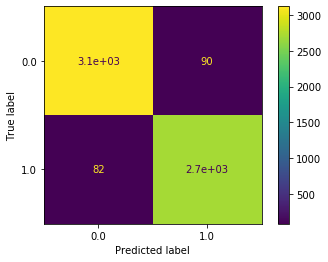

In [27]:
metrics.plot_confusion_matrix(rf_search, X_test, y_test)

## Random Forest Feature Importance

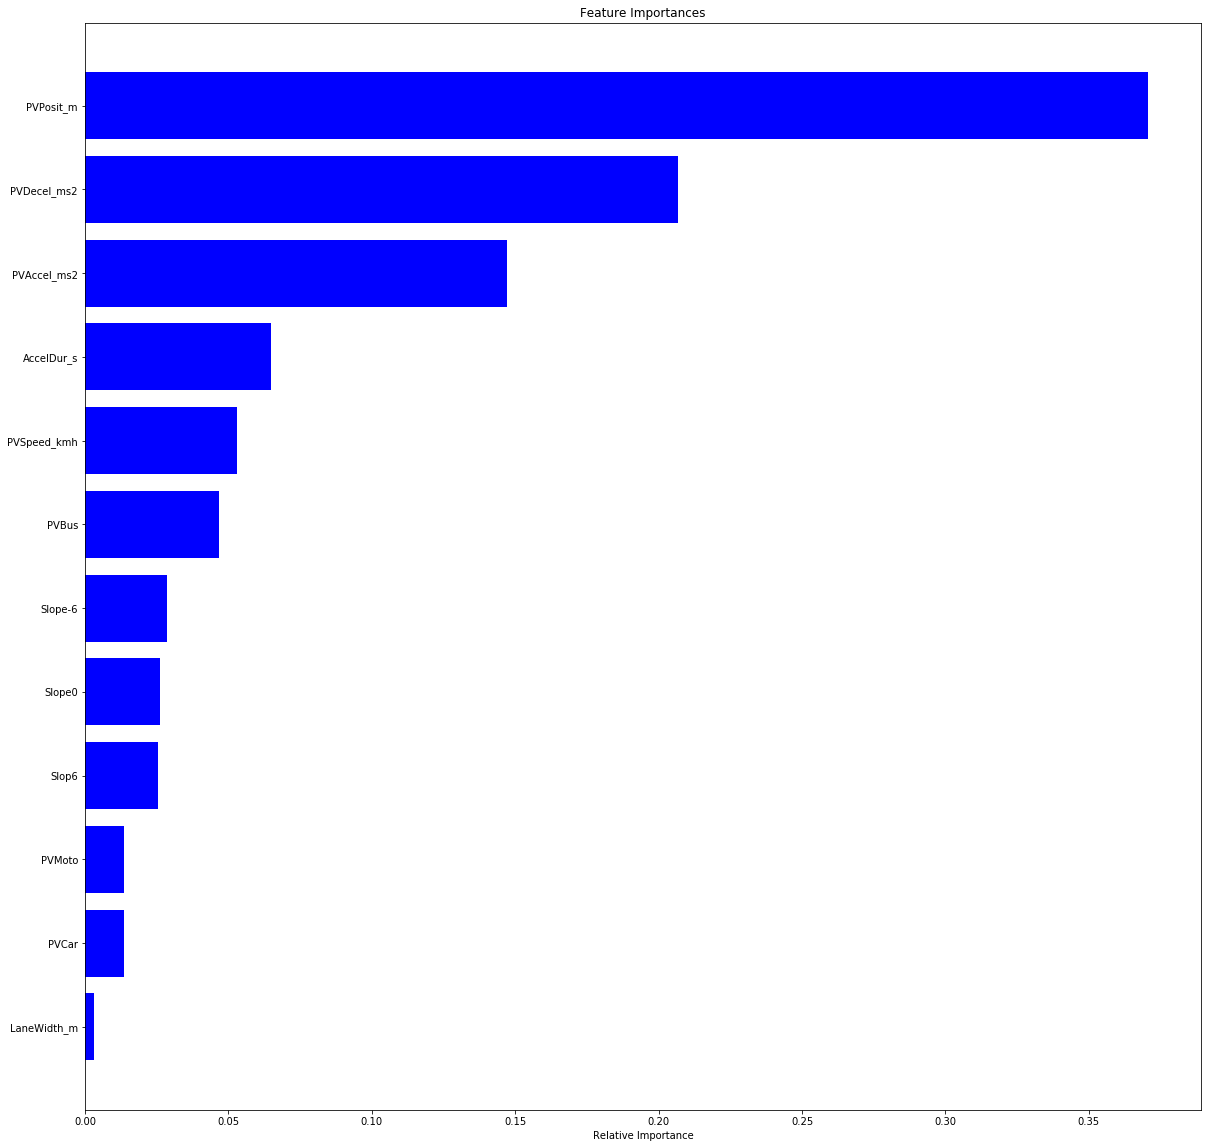

In [29]:
features = X_train.columns
importances = rf_search.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20, 20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Gradient Boosting Classifier

In [32]:
param_grid = {"max_features": ["log2"],
              "max_depth": [5],
              "n_estimators": [300],
              "min_samples_split" : [7],
              'alpha': [10**i for i in np.arange(-4, 4, 2, dtype=float)]}

# Create the random grid
random_grid = { # Number of trees in gradient boost
               'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 400, num = 8)],
                # Number of features to consider at every split
               'max_features': ['auto', 'sqrt', 'log2'],
                # Maximum number of levels in tree
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)] + [None],
                # Minimum number of samples required to split a node
               'min_samples_split': [2, 5, 10],
                # Minimum number of samples required at each leaf node
               'min_samples_leaf': [1, 2, 4],
               'learning_rate': [0.1, 1],
               'subsample': [0.5, 0.7, 0.9]}

print(random_grid)
gb = GradientBoostingClassifier(random_state=0)
gb_search = RandomizedSearchCV(estimator = gb, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=1, random_state=0)
gb_search = gb_search.fit(X_train, y_train)

{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'learning_rate': [0.1, 1], 'subsample': [0.5, 0.7, 0.9]}
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/az01661/OneDrive - Alliance/pfa/pfa-venv/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/az01661/OneDrive - Alliance/pfa/pfa-venv/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/az01661/OneDrive - Alliance/pfa/pfa-venv/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/az01661/OneDrive - Alliance

/Users/az01661/OneDrive - Alliance/pfa/pfa-venv/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/az01661/OneDrive - Alliance/pfa/pfa-venv/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.4min finished
/Users/az01661/OneDrive - Alliance/pfa/pfa-venv/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
gb_search.best_params_

{'subsample': 0.9,
 'n_estimators': 350,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 50,
 'learning_rate': 0.1}

## Gradient Boosting Model Evaluation 

In [34]:
# predicting over training & testing datasets
y_train_pred = gb_search.predict(X_train)
y_test_pred = gb_search.predict(X_test)

##  Model evaluation 

### Accuracy

There are other ways of measuring model performance (precision, recall, F1 Score, ROC Curve, etc). The accuracy is very simple to obtain. To get the mean accuracy on the given training dataset, we can use the method `score`:

In [35]:
gb_search.score(X_train, y_train)

1.0

To get the mean accuracy on the given test dataset, we can also use the method `score`:

In [36]:
gb_search.score(X_test, y_test)

0.9774887443721861

### Confusion Matrix

In [37]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[3153,   57],
       [  78, 2709]])

`scikit-learn` also offers a nice function to plot the confusion matrix.

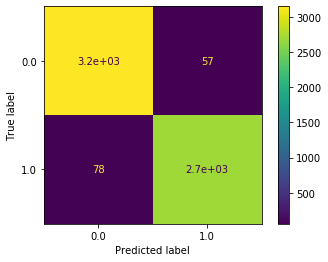

In [38]:
metrics.plot_confusion_matrix(gb_search, X_test, y_test)

### Recall

The recall of each class:

In [39]:
metrics.recall_score(y_test, y_test_pred, average=None)

array([0.98224299, 0.97201292])

### Precision

The precision of each class:

In [40]:
metrics.precision_score(y_test, y_test_pred, average=None)

array([0.97585887, 0.97939262])

### F1score

The f1score of each class:

In [41]:
metrics.f1_score(y_test, y_test_pred, average=None)

array([0.97904052, 0.97568882])

### Receiver Operating Characteristic - AUC

In able to plot ROC or evaluate AUC, we need the probability outputs of our model instead of the final prediction.

We call the `predict_proba` method rather than `predict` in order to obtain a list of probabilities which represent the likelihood that a sample falls under a given category. 

In [42]:
probs = gb_search.predict_proba(X_test)
malignant_probs = probs[:,1]

# calculating roc arguments
fpr, tpr, thresholds = metrics.roc_curve(y_test, malignant_probs)
# calculating auc
roc_auc = metrics.auc(fpr, tpr)

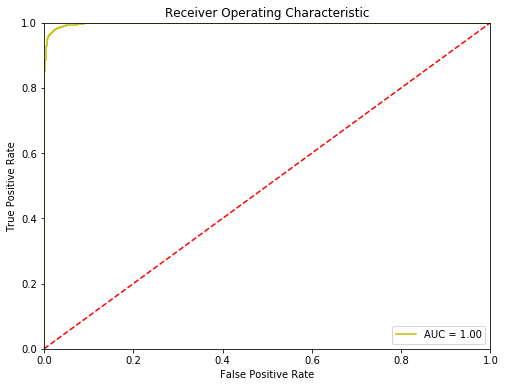

In [43]:
plt.figure(figsize=[8,6])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Gradient Boost Feature Importance

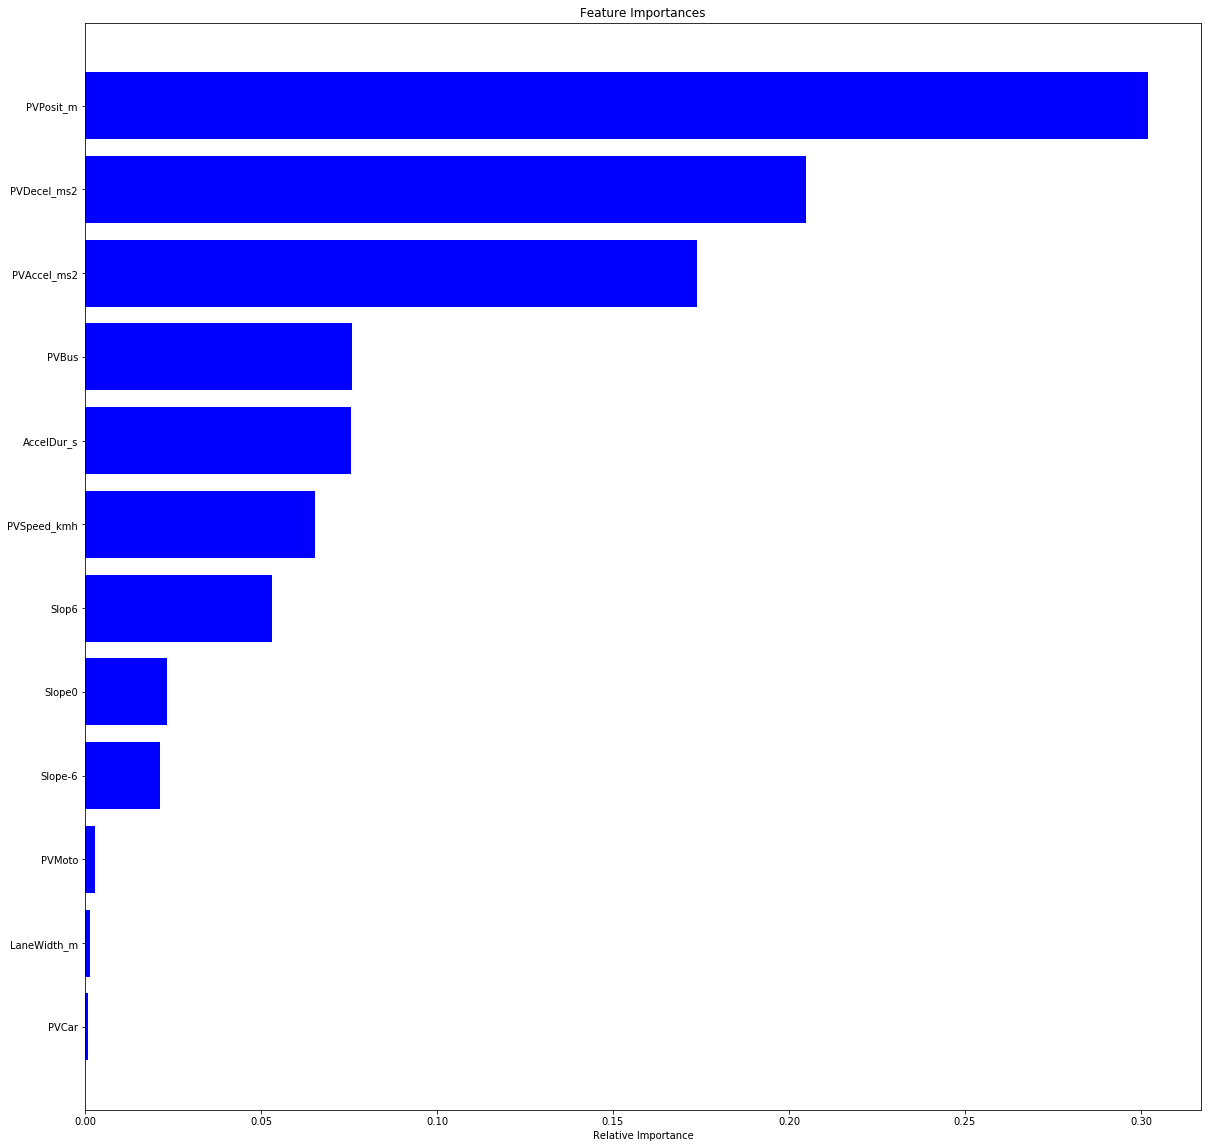

In [44]:
features = X_train.columns
importances = gb_search.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20, 20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# References

https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205

https://medium.com/@ODSC/optimizing-hyperparameters-for-random-forest-algorithms-in-scikit-learn-d60b7aa07ead

https://towardsdatascience.com/basic-ensemble-learning-random-forest-adaboost-gradient-boosting-step-by-step-explained-95d49d1e2725